In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
network_data=pd.read_table('edge.txt')
print(network_data.head())
node_data=pd.read_table('node.txt')
#node_data.head()

        from        to    weight class  fromsize  tosize
0  ARID5B(+)   ATF3(+)  0.596296    TF         3      10
1  ARID5B(+)   ATF4(+)  0.653620    TF         3       8
2  ARID5B(+)  CEBPB(+)  0.379261    TF         3       1
3  ARID5B(+)  CEBPD(+)  0.375187    TF         3       0
4  ARID5B(+)  CEBPG(+)  0.345009    TF         3       0


In [2]:
G2 = nx.Graph()
for index, row in network_data.iterrows(): 
    G2.add_edge(row['from'],row['to'],weight=row['weight']) #,source_size=row['fromsize']*3+1, target_size=row['tosize']*3+1


In [3]:
from networkx.algorithms import community
import seaborn as sns
communities = community.louvain_communities(G2,seed=10)#resolution=1.2,
# 创建一个字典来存储每个节点所属的社区
node_community = {}
for idx, comm in enumerate(communities):
    for node in comm:
        node_community[node] = idx
node_colors = sns.color_palette(n_colors=10000)

In [10]:
import csv
with open('node_community.txt', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter='\t')
    for key, value in node_community.items():
        writer.writerow([key, value])

In [370]:
node_colors[0]=node_colors[1]
node_colors[1]=node_colors[9]

In [371]:
rmnode =[key for key, value in node_community.items() if list(node_community.values()).count(value) < 5]
rmnode
for i in rmnode:
    G2.remove_node(i)

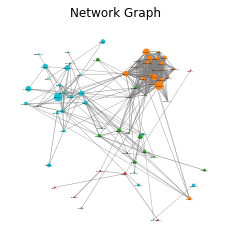

In [373]:
# 调整节点位置
pos = nx.spring_layout(G2,k=0.5, weight='weight',seed=10)
#pos = nx.circular_layout(G2)#,weight='weight',seed=10
#center = [0.5, 0.5]  # 中心位置
#scale = 0.5  # 缩放比例
#for node in high_node:
#    pos[node] = [center[0] + scale * (pos[node][0] - center[0]),
#                 center[1] + scale * (pos[node][1] - center[1])]
node_color = []
for key in pos.keys():
    node_color.append(node_colors[node_community[key]])
# 获取节点大小
node_sizes = [(node_data.loc[node_data['TF'] == key, 'BMnumber']*3+0.5).tolist()[0] for key in pos.keys()]
edge_weights = [data['weight'] for _, _, data in G2.edges(data=True)]
# 绘制网络图
plt.figure(figsize=(3, 3))
nx.draw(G2, pos, node_size=node_sizes, width=edge_weights, font_size=2,with_labels=True,
        node_color=node_color, edge_color='gray')
#edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Network Graph')
plt.axis('off')
plt.savefig('TF.network.png', format='png', dpi=1000, bbox_inches='tight')
plt.show()